# **SKIN CANCER IMAGE CLASSIFICATION**

In [1]:
# Import Relevant Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers

import warnings
warnings.filterwarnings('ignore')

In [2]:
# imports
import matplotlib.image as mpimg

In [3]:
!ls ../data

ISIC_2019_Training_GroundTruth.csv
ISIC_2019_Training_Input
ISIC_2019_Training_Metadata.csv
ISIC_2020_Training_GroundTruth.csv
ISIC_2020_Training_JPEG
zip folders


**DATASET-1:**

https://challenge2020.isic-archive.com/


The dataset contains 33,126 dermoscopic training images of unique benign and malignant skin lesions from over 2,000 patients. Each image is associated with one of these individuals using a unique patient identifier. All malignant diagnoses have been confirmed via histopathology, and benign diagnoses have been confirmed using either expert agreement, longitudinal follow-up, or histopathology. A thorough publication describing all features of this dataset is available in the form of a pre-print that has not yet undergone peer review.

The dataset was generated by the International Skin Imaging Collaboration (ISIC) and images are from the following sources: Hospital Clínic de Barcelona, Medical University of Vienna, Memorial Sloan Kettering Cancer Center, Melanoma Institute Australia, University of Queensland, and the University of Athens Medical School.

The dataset was curated for the SIIM-ISIC Melanoma Classification Challenge hosted on Kaggle during the Summer of 2020.

DOI: https://doi.org/10.34970/2020-ds01




**DATASET-2:**

https://challenge2019.isic-archive.com/

Background

Skin cancer is the most common cancer globally, with melanoma being the most deadly form. Dermoscopy is a skin imaging modality that has demonstrated improvement for diagnosis of skin cancer compared to unaided visual inspection. However, clinicians should receive adequate training for those improvements to be realized. In order to make expertise more widely available, the International Skin Imaging Collaboration (ISIC) has developed the ISIC Archive, an international repository of dermoscopic images, for both the purposes of clinical training, and for supporting technical research toward automated algorithmic analysis by hosting the ISIC Challenges.

#Task
The goal for ISIC 2019 is classify dermoscopic images among nine different diagnostic categories:

- Melanoma
- Melanocytic nevus
- Basal cell carcinoma
- Actinic keratosis
- Benign keratosis (solar lentigo / seborrheic keratosis / lichen planus-like keratosis)
- Dermatofibroma
- Vascular lesion
- Squamous cell carcinoma
- None of the others


25,331 images are available for training across 8 different categories. 

In [4]:
# define datasets
data1 = pd.read_csv('../data/ISIC_2020_Training_GroundTruth.csv')
data2 = pd.read_csv('../data/ISIC_2019_Training_Metadata.csv')
data3 = pd.read_csv('../data/ISIC_2019_Training_GroundTruth.csv')

In [5]:
!ls ../data

ISIC_2019_Training_GroundTruth.csv
ISIC_2019_Training_Input
ISIC_2019_Training_Metadata.csv
ISIC_2020_Training_GroundTruth.csv
ISIC_2020_Training_JPEG
zip folders


In [6]:
# define the file path
data2019_directory = '../data/ISIC_2019_Training_Input/'
data2020_directory = '../data/ISIC_2020_Training_JPEG/'

## Data Exploration

### ISIC - 2020 DATASET

In [7]:
data1

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0
...,...,...,...,...,...,...,...,...
33121,ISIC_9999134,IP_6526534,male,50.0,torso,unknown,benign,0
33122,ISIC_9999320,IP_3650745,male,65.0,torso,unknown,benign,0
33123,ISIC_9999515,IP_2026598,male,20.0,lower extremity,unknown,benign,0
33124,ISIC_9999666,IP_7702038,male,50.0,lower extremity,unknown,benign,0


In [8]:
data1['target'].value_counts()

0    32542
1      584
Name: target, dtype: int64

In [9]:
data1['diagnosis'].value_counts()

unknown                               27124
nevus                                  5193
melanoma                                584
seborrheic keratosis                    135
lentigo NOS                              44
lichenoid keratosis                      37
solar lentigo                             7
cafe-au-lait macule                       1
atypical melanocytic proliferation        1
Name: diagnosis, dtype: int64

In [10]:
# add image's path data to train and test set
data1['path'] = data2020_directory + data1['image_name'] + ".jpg"

In [11]:
data1.rename(columns = {'anatom_site_general_challenge':'anatom_site_general'}, inplace = True)
data1

,image_name,patient_id,sex,age_approx,anatom_site_general,diagnosis,benign_malignant,target,path
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_2637011.jpg
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_0015719.jpg
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_0052212.jpg
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_0068279.jpg
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_0074268.jpg
...,...,...,...,...,...,...,...,...,...
33121,ISIC_9999134,IP_6526534,male,50.0,torso,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_9999134.jpg
33122,ISIC_9999320,IP_3650745,male,65.0,torso,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_9999320.jpg
33123,ISIC_9999515,IP_2026598,male,20.0,lower extremity,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_9999515.jpg
33124,ISIC_9999666,IP_7702038,male,50.0,lower extremity,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_9999666.jpg


In [12]:
data1

,image_name,patient_id,sex,age_approx,anatom_site_general,diagnosis,benign_malignant,target,path
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_2637011.jpg
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_0015719.jpg
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_0052212.jpg
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_0068279.jpg
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_0074268.jpg
...,...,...,...,...,...,...,...,...,...
33121,ISIC_9999134,IP_6526534,male,50.0,torso,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_9999134.jpg
33122,ISIC_9999320,IP_3650745,male,65.0,torso,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_9999320.jpg
33123,ISIC_9999515,IP_2026598,male,20.0,lower extremity,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_9999515.jpg
33124,ISIC_9999666,IP_7702038,male,50.0,lower extremity,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_9999666.jpg


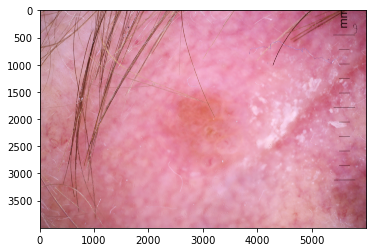

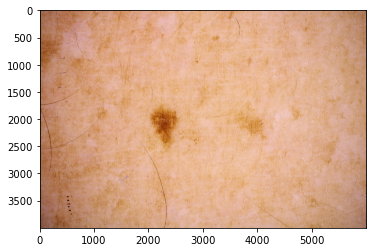

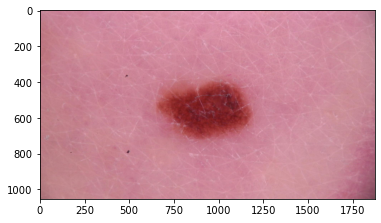

In [13]:
# look into 3 image samples:
for im in data1['path'][:3]:
    img = mpimg.imread(im)
    imgplot = plt.imshow(img)
    plt.show()

### ISIC - 2019 DATASET

In [14]:
data2

,image,age_approx,anatom_site_general,lesion_id,sex
0,ISIC_0000000,55.0,anterior torso,NaN,female
1,ISIC_0000001,30.0,anterior torso,NaN,female
2,ISIC_0000002,60.0,upper extremity,NaN,female
3,ISIC_0000003,30.0,upper extremity,NaN,male
4,ISIC_0000004,80.0,posterior torso,NaN,male
...,...,...,...,...,...
25326,ISIC_0073247,85.0,head/neck,BCN_0003925,female
25327,ISIC_0073248,65.0,anterior torso,BCN_0001819,male
25328,ISIC_0073249,70.0,lower extremity,BCN_0001085,male
25329,ISIC_0073251,55.0,palms/soles,BCN_0002083,female


In [15]:
data3

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
25326,ISIC_0073247,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25327,ISIC_0073248,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25328,ISIC_0073249,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25329,ISIC_0073251,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- MEL: Melonoma   --->  Malignant
- NV: Melanocytic nevus ---> Benign
- BCC: Basal cell carcinoma ---> Malignant
- AK: Actinic keratosis ---> Benign
- BKL: Benign keratosis ---> Benign
- DF: Dermatofibroma ---> Benign
- VASC: Vascular Lesion  ---> Can be Benign or Malignant  ---> Unknown
- SCC: Squamous cell carcinoma ---> Malignant
- UNK: Unknown

In [16]:
df = pd.merge(data2, data3, on='image')
df.rename(columns = {'image':'image_name'}, inplace = True)
df

,image_name,age_approx,anatom_site_general,lesion_id,sex,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,55.0,anterior torso,NaN,female,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,30.0,anterior torso,NaN,female,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,60.0,upper extremity,NaN,female,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,30.0,upper extremity,NaN,male,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,80.0,posterior torso,NaN,male,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25326,ISIC_0073247,85.0,head/neck,BCN_0003925,female,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25327,ISIC_0073248,65.0,anterior torso,BCN_0001819,male,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25328,ISIC_0073249,70.0,lower extremity,BCN_0001085,male,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25329,ISIC_0073251,55.0,palms/soles,BCN_0002083,female,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
df['benign_malignant'] = 0*len(df['image_name'])
for i in df.index:
    if df['MEL'][i] ==1:
        df['benign_malignant'][i] = 'malignant'
    if df['NV'][i] ==1:
        df['benign_malignant'][i] = 'benign'
    if df['BCC'][i] ==1:
        df['benign_malignant'][i] = 'malignant'
    if df['AK'][i] ==1:
        df['benign_malignant'][i] = 'benign'
    if df['BKL'][i] ==1:
        df['benign_malignant'][i] = 'benign'
    if df['DF'][i] ==1:
        df['benign_malignant'][i] = 'benign'
    if df['VASC'][i] ==1:
        df['benign_malignant'][i] = 'unknown'
    if df['SCC'][i] ==1:
        df['benign_malignant'][i] = 'malignant'
    if df['UNK'][i] ==1:
        df['benign_malignant'][i] = 'unknown'        

In [18]:
df.drop(columns=['MEL','NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK'], axis=1, inplace=True)
df

,image_name,age_approx,anatom_site_general,lesion_id,sex,benign_malignant
0,ISIC_0000000,55.0,anterior torso,NaN,female,benign
1,ISIC_0000001,30.0,anterior torso,NaN,female,benign
2,ISIC_0000002,60.0,upper extremity,NaN,female,malignant
3,ISIC_0000003,30.0,upper extremity,NaN,male,benign
4,ISIC_0000004,80.0,posterior torso,NaN,male,malignant
...,...,...,...,...,...,...
25326,ISIC_0073247,85.0,head/neck,BCN_0003925,female,malignant
25327,ISIC_0073248,65.0,anterior torso,BCN_0001819,male,benign
25328,ISIC_0073249,70.0,lower extremity,BCN_0001085,male,malignant
25329,ISIC_0073251,55.0,palms/soles,BCN_0002083,female,benign


In [19]:
df['benign_malignant'].value_counts()

benign       16605
malignant     8473
unknown        253
Name: benign_malignant, dtype: int64

In [20]:
data2019 = df[df['benign_malignant']!='unknown']
data2019

,image_name,age_approx,anatom_site_general,lesion_id,sex,benign_malignant
0,ISIC_0000000,55.0,anterior torso,NaN,female,benign
1,ISIC_0000001,30.0,anterior torso,NaN,female,benign
2,ISIC_0000002,60.0,upper extremity,NaN,female,malignant
3,ISIC_0000003,30.0,upper extremity,NaN,male,benign
4,ISIC_0000004,80.0,posterior torso,NaN,male,malignant
...,...,...,...,...,...,...
25326,ISIC_0073247,85.0,head/neck,BCN_0003925,female,malignant
25327,ISIC_0073248,65.0,anterior torso,BCN_0001819,male,benign
25328,ISIC_0073249,70.0,lower extremity,BCN_0001085,male,malignant
25329,ISIC_0073251,55.0,palms/soles,BCN_0002083,female,benign


In [21]:
df['target'] = 0*len(df['image_name'])
for i in data2019.index:
    if data2019['benign_malignant'][i] == 'malignant':
        df['target'][i] = 1
    else:
        df['target'][i] = 0


In [22]:
df

,image_name,age_approx,anatom_site_general,lesion_id,sex,benign_malignant,target
0,ISIC_0000000,55.0,anterior torso,NaN,female,benign,0
1,ISIC_0000001,30.0,anterior torso,NaN,female,benign,0
2,ISIC_0000002,60.0,upper extremity,NaN,female,malignant,1
3,ISIC_0000003,30.0,upper extremity,NaN,male,benign,0
4,ISIC_0000004,80.0,posterior torso,NaN,male,malignant,1
...,...,...,...,...,...,...,...
25326,ISIC_0073247,85.0,head/neck,BCN_0003925,female,malignant,1
25327,ISIC_0073248,65.0,anterior torso,BCN_0001819,male,benign,0
25328,ISIC_0073249,70.0,lower extremity,BCN_0001085,male,malignant,1
25329,ISIC_0073251,55.0,palms/soles,BCN_0002083,female,benign,0


In [23]:
df

,image_name,age_approx,anatom_site_general,lesion_id,sex,benign_malignant,target
0,ISIC_0000000,55.0,anterior torso,NaN,female,benign,0
1,ISIC_0000001,30.0,anterior torso,NaN,female,benign,0
2,ISIC_0000002,60.0,upper extremity,NaN,female,malignant,1
3,ISIC_0000003,30.0,upper extremity,NaN,male,benign,0
4,ISIC_0000004,80.0,posterior torso,NaN,male,malignant,1
...,...,...,...,...,...,...,...
25326,ISIC_0073247,85.0,head/neck,BCN_0003925,female,malignant,1
25327,ISIC_0073248,65.0,anterior torso,BCN_0001819,male,benign,0
25328,ISIC_0073249,70.0,lower extremity,BCN_0001085,male,malignant,1
25329,ISIC_0073251,55.0,palms/soles,BCN_0002083,female,benign,0


In [24]:
# add image's path data 
df['path'] = data2019_directory + df['image_name'] + ".jpg"

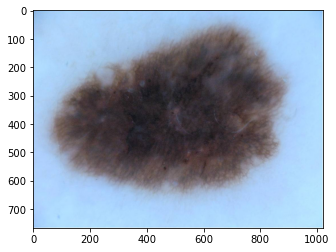

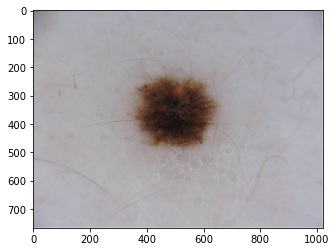

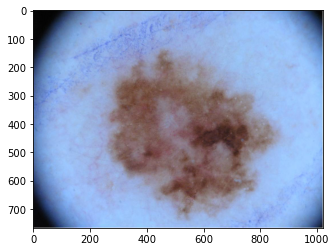

In [30]:
# look into top 5 data and see the images:
for im in df['path'][:3]:
    img = mpimg.imread(im)
    imgplot = plt.imshow(img)
    plt.show()

## Final Dataset:


In [26]:
# Data from ISIC 2020
data1

,image_name,patient_id,sex,age_approx,anatom_site_general,diagnosis,benign_malignant,target,path
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_2637011.jpg
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_0015719.jpg
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_0052212.jpg
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_0068279.jpg
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_0074268.jpg
...,...,...,...,...,...,...,...,...,...
33121,ISIC_9999134,IP_6526534,male,50.0,torso,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_9999134.jpg
33122,ISIC_9999320,IP_3650745,male,65.0,torso,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_9999320.jpg
33123,ISIC_9999515,IP_2026598,male,20.0,lower extremity,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_9999515.jpg
33124,ISIC_9999666,IP_7702038,male,50.0,lower extremity,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_9999666.jpg


In [27]:
# Data from ISIC 2019
df

,image_name,age_approx,anatom_site_general,lesion_id,sex,benign_malignant,target,path
0,ISIC_0000000,55.0,anterior torso,NaN,female,benign,0,../data/ISIC_2019_Training_Input/ISIC_0000000.jpg
1,ISIC_0000001,30.0,anterior torso,NaN,female,benign,0,../data/ISIC_2019_Training_Input/ISIC_0000001.jpg
2,ISIC_0000002,60.0,upper extremity,NaN,female,malignant,1,../data/ISIC_2019_Training_Input/ISIC_0000002.jpg
3,ISIC_0000003,30.0,upper extremity,NaN,male,benign,0,../data/ISIC_2019_Training_Input/ISIC_0000003.jpg
4,ISIC_0000004,80.0,posterior torso,NaN,male,malignant,1,../data/ISIC_2019_Training_Input/ISIC_0000004.jpg
...,...,...,...,...,...,...,...,...
25326,ISIC_0073247,85.0,head/neck,BCN_0003925,female,malignant,1,../data/ISIC_2019_Training_Input/ISIC_0073247.jpg
25327,ISIC_0073248,65.0,anterior torso,BCN_0001819,male,benign,0,../data/ISIC_2019_Training_Input/ISIC_0073248.jpg
25328,ISIC_0073249,70.0,lower extremity,BCN_0001085,male,malignant,1,../data/ISIC_2019_Training_Input/ISIC_0073249.jpg
25329,ISIC_0073251,55.0,palms/soles,BCN_0002083,female,benign,0,../data/ISIC_2019_Training_Input/ISIC_0073251.jpg


In [28]:
df_final = pd.concat([data1, df], axis=0)
df_final

,image_name,patient_id,sex,age_approx,anatom_site_general,diagnosis,benign_malignant,target,path,lesion_id
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_2637011.jpg,NaN
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_0015719.jpg,NaN
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_0052212.jpg,NaN
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_0068279.jpg,NaN
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_0074268.jpg,NaN
...,...,...,...,...,...,...,...,...,...,...
25326,ISIC_0073247,NaN,female,85.0,head/neck,NaN,malignant,1,../data/ISIC_2019_Training_Input/ISIC_0073247.jpg,BCN_0003925
25327,ISIC_0073248,NaN,male,65.0,anterior torso,NaN,benign,0,../data/ISIC_2019_Training_Input/ISIC_0073248.jpg,BCN_0001819
25328,ISIC_0073249,NaN,male,70.0,lower extremity,NaN,malignant,1,../data/ISIC_2019_Training_Input/ISIC_0073249.jpg,BCN_0001085
25329,ISIC_0073251,NaN,female,55.0,palms/soles,NaN,benign,0,../data/ISIC_2019_Training_Input/ISIC_0073251.jpg,BCN_0002083


In [35]:
df_final['target'].value_counts(normalize=True)

0    0.845066
1    0.154934
Name: target, dtype: float64

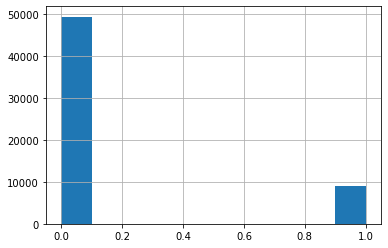

In [48]:
df_final['target'].hist();

We still have class imbalance issue, but this is better than having 1% for minority class.

In [44]:
!ls ../data

ISIC_2019_Training_GroundTruth.csv
ISIC_2019_Training_Input
ISIC_2019_Training_Metadata.csv
ISIC_2020_Training_GroundTruth.csv
ISIC_2020_Training_JPEG
df_final.csv
zip folders


In [43]:
# Save the final dataset
df_final.to_csv('../data/df_final.csv')

In [36]:
# Define X and y 
X = df_final.drop(columns=['target'], axis=1)
y = df_final['target']

In [37]:
X

,image_name,patient_id,sex,age_approx,anatom_site_general,diagnosis,benign_malignant,path,lesion_id
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,../data/ISIC_2020_Training_JPEG/ISIC_2637011.jpg,NaN
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,../data/ISIC_2020_Training_JPEG/ISIC_0015719.jpg,NaN
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,../data/ISIC_2020_Training_JPEG/ISIC_0052212.jpg,NaN
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,../data/ISIC_2020_Training_JPEG/ISIC_0068279.jpg,NaN
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,../data/ISIC_2020_Training_JPEG/ISIC_0074268.jpg,NaN
...,...,...,...,...,...,...,...,...,...
25326,ISIC_0073247,NaN,female,85.0,head/neck,NaN,malignant,../data/ISIC_2019_Training_Input/ISIC_0073247.jpg,BCN_0003925
25327,ISIC_0073248,NaN,male,65.0,anterior torso,NaN,benign,../data/ISIC_2019_Training_Input/ISIC_0073248.jpg,BCN_0001819
25328,ISIC_0073249,NaN,male,70.0,lower extremity,NaN,malignant,../data/ISIC_2019_Training_Input/ISIC_0073249.jpg,BCN_0001085
25329,ISIC_0073251,NaN,female,55.0,palms/soles,NaN,benign,../data/ISIC_2019_Training_Input/ISIC_0073251.jpg,BCN_0002083


In [38]:
# Train - Holdout Set Split
X_train, X_hold, y_train, y_hold = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [45]:
# Regular Train - Test Split
X_tr, X_te, y_tr, y_te = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [46]:
X_tr

,image_name,patient_id,sex,age_approx,anatom_site_general,diagnosis,benign_malignant,path,lesion_id
3041,ISIC_0024444,NaN,female,55.0,lower extremity,NaN,benign,../data/ISIC_2019_Training_Input/ISIC_0024444.jpg,HAM_0005543
23661,ISIC_7184722,IP_1969685,male,50.0,torso,unknown,benign,../data/ISIC_2020_Training_JPEG/ISIC_7184722.jpg,NaN
2758,ISIC_0015496_downsampled,NaN,female,20.0,posterior torso,NaN,benign,../data/ISIC_2019_Training_Input/ISIC_0015496_...,NaN
1238,ISIC_0474975,IP_6776978,female,60.0,lower extremity,unknown,benign,../data/ISIC_2020_Training_JPEG/ISIC_0474975.jpg,NaN
18673,ISIC_5667469,IP_9422872,female,60.0,torso,unknown,benign,../data/ISIC_2020_Training_JPEG/ISIC_5667469.jpg,NaN
...,...,...,...,...,...,...,...,...,...
493,ISIC_0001131_downsampled,NaN,male,45.0,upper extremity,NaN,malignant,../data/ISIC_2019_Training_Input/ISIC_0001131_...,NaN
7441,ISIC_0028844,NaN,female,30.0,NaN,NaN,benign,../data/ISIC_2019_Training_Input/ISIC_0028844.jpg,HAM_0003184
18377,ISIC_0062217,NaN,male,70.0,anterior torso,NaN,malignant,../data/ISIC_2019_Training_Input/ISIC_0062217.jpg,BCN_0004236
5552,ISIC_1760981,IP_1705144,female,50.0,torso,unknown,benign,../data/ISIC_2020_Training_JPEG/ISIC_1760981.jpg,NaN


In [47]:
X_te

,image_name,patient_id,sex,age_approx,anatom_site_general,diagnosis,benign_malignant,path,lesion_id
13235,ISIC_0053970,NaN,female,35.0,upper extremity,NaN,benign,../data/ISIC_2019_Training_Input/ISIC_0053970.jpg,BCN_0003921
24404,ISIC_0071815,NaN,female,80.0,anterior torso,NaN,malignant,../data/ISIC_2019_Training_Input/ISIC_0071815.jpg,BCN_0000121
16605,ISIC_0059385,NaN,female,45.0,lower extremity,NaN,benign,../data/ISIC_2019_Training_Input/ISIC_0059385.jpg,BCN_0004491
26797,ISIC_8124459,IP_9616517,female,40.0,upper extremity,unknown,benign,../data/ISIC_2020_Training_JPEG/ISIC_8124459.jpg,NaN
27067,ISIC_8199467,IP_1195596,male,35.0,torso,unknown,benign,../data/ISIC_2020_Training_JPEG/ISIC_8199467.jpg,NaN
...,...,...,...,...,...,...,...,...,...
27558,ISIC_8340426,IP_8027787,male,75.0,lower extremity,seborrheic keratosis,benign,../data/ISIC_2020_Training_JPEG/ISIC_8340426.jpg,NaN
465,ISIC_0000540,NaN,NaN,NaN,NaN,NaN,benign,../data/ISIC_2019_Training_Input/ISIC_0000540.jpg,NaN
5640,ISIC_0027043,NaN,male,50.0,anterior torso,NaN,malignant,../data/ISIC_2019_Training_Input/ISIC_0027043.jpg,HAM_0007390
4727,ISIC_1515410,IP_0921705,male,50.0,upper extremity,unknown,benign,../data/ISIC_2020_Training_JPEG/ISIC_1515410.jpg,NaN
